In [61]:
import pandas as pd
import datetime as date
import time
import numpy as np
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from numpy import array
from keras.models import load_model
from sklearn.decomposition import PCA
from sklearn.svm import SVR

# PLD

In [16]:
df_PLD = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\Historico_do_Preco_Horario_-Ajustado.xlsx')
df_PLD

,Hora,Submercado,2018-05-02 00:00:00,2018-05-03 00:00:00,2018-05-04 00:00:00,2018-05-05 00:00:00,2018-05-06 00:00:00,2018-05-07 00:00:00,2018-05-08 00:00:00,2018-05-09 00:00:00,...,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-24 00:00:00,2021-12-25 00:00:00,2021-12-26 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00,2021-12-30 00:00:00,2021-12-31 00:00:00
0,0,SUDESTE,209.44,40.16,218.44,280.71,40.16,40.16,230.81,209.54,...,68.74,68.10,66.01,66.32,68.60,67.56,69.55,67.45,67.30,67.39
1,0,SUL,209.48,40.16,218.48,280.75,40.16,40.16,230.85,209.58,...,68.74,68.10,66.01,66.32,68.60,67.56,69.55,67.45,67.30,67.39
2,0,NORDESTE,154.13,40.16,104.69,107.95,40.16,40.16,40.16,40.16,...,68.74,68.10,66.01,66.32,68.60,67.56,69.55,67.45,67.30,67.39
3,0,NORTE,154.09,40.16,104.65,107.91,40.16,40.16,40.16,40.16,...,68.74,68.10,66.01,66.32,68.60,67.56,69.55,67.45,67.30,67.39
4,1,SUDESTE,196.82,40.16,218.24,255.57,40.16,40.16,220.07,192.14,...,66.53,66.56,63.91,65.92,67.64,66.77,67.58,64.71,66.27,65.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,22,NORTE,223.31,160.36,85.61,108.23,111.48,111.48,40.16,40.16,...,68.46,66.96,62.98,67.73,68.39,68.90,69.17,67.08,67.39,52.12
92,23,SUDESTE,223.31,220.94,219.97,279.41,240.36,240.36,306.31,309.99,...,67.76,66.90,62.04,67.49,67.24,67.75,67.85,66.59,67.24,63.16
93,23,SUL,223.33,220.98,220.01,279.43,240.40,240.40,306.35,310.03,...,67.76,66.90,62.04,67.49,67.24,67.75,67.85,66.59,67.24,63.16
94,23,NORDESTE,223.33,160.40,152.14,108.27,111.52,111.52,40.16,40.16,...,67.76,66.90,62.04,67.49,67.24,66.64,67.66,63.18,63.55,58.09


In [17]:
def InicioTratamentoPLD(df1):
    lastcol = 1342 #2022-01-01
    c= 2 #Ignora indices
    dfaux = pd.DataFrame({'Data' : [0]*4, 'Ano' : [0]*4,
                        'Mês' : [0]*4, 'Dia' : [0]*4,
                         'Submercado' : ['']*4, 
                        'PLD médio'  : [0.00]*4})
    df2 = pd.DataFrame()

    while c < lastcol:

        Year=df1.columns[c].year
        Month=df1.columns[c].month
        Day=df1.columns[c].day
        Date=pd.Timestamp(year=Year, month=Month, day=Day)
        sudeste=0
        sul=0
        nordeste=0
        norte=0
        for i in range(len(df1)):
            if df1.iloc[:,2].isna()[i] == False:
                if df1.iloc[i,1] == 'SUDESTE':
                    sudeste+=df1.iloc[i,c]

                if df1.iloc[i,1] == 'SUL':
                    sul+=df1.iloc[i,c]

                if df1.iloc[i,1] == 'NORDESTE':
                    nordeste+=df1.iloc[i,c]

                if df1.iloc[i,1] == 'NORTE':
                    norte+=df1.iloc[i,c]

        dfaux.iloc[0,0]=Date.date()
        dfaux.iloc[0,1]=Year
        dfaux.iloc[0,2]=Month
        dfaux.iloc[0,3]=Day
        dfaux.iloc[0,4]='SUDESTE'
        dfaux.iloc[0,5]=sudeste/24

        dfaux.iloc[1,0]=Date.date()
        dfaux.iloc[1,1]=Year
        dfaux.iloc[1,2]=Month
        dfaux.iloc[1,3]=Day
        dfaux.iloc[1,4]='SUL'
        dfaux.iloc[1,5]=sul/24

        dfaux.iloc[2,0]=Date.date()
        dfaux.iloc[2,1]=Year
        dfaux.iloc[2,2]=Month
        dfaux.iloc[2,3]=Day
        dfaux.iloc[2,4]='NORDESTE'
        dfaux.iloc[2,5]=nordeste/24

        dfaux.iloc[3,0]=Date.date()
        dfaux.iloc[3,1]=Year
        dfaux.iloc[3,2]=Month
        dfaux.iloc[3,3]=Day
        dfaux.iloc[3,4]='NORTE'
        dfaux.iloc[3,5]=norte/24

        df2 = df2.append(dfaux)
        c+=1
    df2 = df2.set_index('Data')
    return df2   

In [18]:
df_medioPLD = InicioTratamentoPLD(df_PLD)


In [19]:
def Etapa2TratamentoPLD(df1):    
    l = len(df1.index.drop_duplicates())
    dfaux_N = pd.DataFrame({'N - PLD Médio (R$/MWh)' : [0.000]*l})
    dfaux_N.index = df1.index.drop_duplicates()

    dfaux_NE = pd.DataFrame({'NE - PLD Médio (R$/MWh)' : [0.000]*l})
    dfaux_NE.index = df1.index.drop_duplicates()

    dfaux_SE = pd.DataFrame({'SE - PLD Médio (R$/MWh)' : [0.000]*l})
    dfaux_SE.index = df1.index.drop_duplicates()

    dfaux_S = pd.DataFrame({'S - PLD Médio (R$/MWh)' : [0.000]*l})
    dfaux_S.index = df1.index.drop_duplicates()

    for i in df1.index:
        for j in [0,1,2,3]:
            if df1.loc[i].iloc[j][3] == 'SUDESTE':
                dfaux_SE.loc[i]['SE - PLD Médio (R$/MWh)'] = df1.loc[i].iloc[j][4]

            if df1.loc[i].iloc[j][3] == 'SUL':
                dfaux_S.loc[i]['S - PLD Médio (R$/MWh)'] = df1.loc[i].iloc[j][4]

            if df1.loc[i].iloc[j][3] == 'NORDESTE':
                dfaux_NE.loc[i]['NE - PLD Médio (R$/MWh)'] = df1.loc[i].iloc[j][4]


            if df1.loc[i].iloc[j][3] == 'NORTE':
                dfaux_N.loc[i]['N - PLD Médio (R$/MWh)'] = df1.loc[i].iloc[j][4]


    df_final = dfaux_SE.join(dfaux_S.join(dfaux_NE.join(dfaux_N)))
    return df_final

In [20]:
df_final_PLD = Etapa2TratamentoPLD(df_medioPLD)
df_final_PLD_2 = df_final_PLD
df_final_PLD_2['Data'] = df_final_PLD_2.index
df_final_PLD_2['Data'] = pd.to_datetime(df_final_PLD_2['Data'])
df_final_PLD = df_final_PLD.drop(columns=['Data'])
df_final_PLD_2 = df_final_PLD_2.set_index('Data')
df_final_PLD_2

,SE - PLD Médio (R$/MWh),S - PLD Médio (R$/MWh),NE - PLD Médio (R$/MWh),N - PLD Médio (R$/MWh)
Data,,,,
2018-05-02,214.646667,214.662500,190.621250,178.925000
2018-05-03,168.905833,168.934167,120.433333,120.406667
2018-05-04,225.345833,225.367500,114.855000,114.823333
2018-05-05,275.532500,275.570833,123.934583,123.894583
2018-05-06,155.334583,155.357917,77.849167,77.827500
...,...,...,...,...
2021-12-27,68.084167,68.085000,68.037917,68.037083
2021-12-28,68.389167,68.389167,68.353333,68.352500
2021-12-29,66.705417,66.705417,66.067500,65.970833


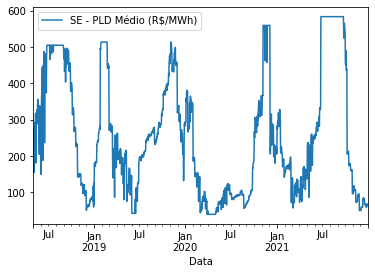

In [21]:
datainicio,datafim = '2018-05-01','2021-12-31'
df_final_PLD_plot = df_final_PLD_2
df_final_PLD_plot['Data'] = pd.to_datetime(df_final_PLD.index)
df_final_PLD_plot = df_final_PLD_plot.loc[datainicio:datafim]
PLDSE = df_final_PLD_plot.plot(x = 'Data', y='SE - PLD Médio (R$/MWh)', kind = 'line')
PLDSE.get_figure().savefig(r'C:\Users\pablo\OneDrive\Pictures\AAA TCC\Plots_Iniciais\PLD_SE')

In [22]:
#df_final_PLD.to_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados Tratados\PLD_2018_2021_diario.xlsx')

________________________________________________________________________________________________________________________

# ENA por Subsistema

In [23]:
df_ENA2018 = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\ENA_DIARIO_SUBSISTEMA_2018.xlsx')
df_ENA2019 = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\ENA_DIARIO_SUBSISTEMA_2019.xlsx')
df_ENA2020 = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\ENA_DIARIO_SUBSISTEMA_2020.xlsx')
df_ENA2021 = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\ENA_DIARIO_SUBSISTEMA_2021.xlsx')
df_ENA_leitura = df_ENA2018.append(df_ENA2019.append(df_ENA2020.append(df_ENA2021)))
df_ENA_leitura

,id_subsistema,nom_subsistema,ena_data,ena_bruta_regiao_mwmed,ena_bruta_regiao_percentualmlt,ena_armazenavel_regiao_mwmed,ena_armazenavel_regiao_percentualmlt
0,N,NORTE,2018-01-01,5860.027832,57.385101,5583.335938,54.675499
1,NE,NORDESTE,2018-01-01,8833.468750,64.665802,8721.403320,63.845402
2,S,SUL,2018-01-01,14006.916016,189.618896,12512.694336,169.390793
3,SE,SUDESTE,2018-01-01,54571.429688,84.698898,47611.117188,73.896004
4,N,NORTE,2018-01-02,5822.967773,57.022202,5560.897949,54.455799
...,...,...,...,...,...,...,...
1455,SE,SUDESTE,2021-12-30,54542.035156,113.530197,47420.378906,98.706398
1456,N,NORTE,2021-12-31,26919.248047,325.574493,24885.343750,300.975494
1457,NE,NORDESTE,2021-12-31,15603.634766,158.611496,13225.830078,134.440994
1458,S,SUL,2021-12-31,1637.843018,22.167200,1225.699951,16.589100


In [24]:
def renomearENA(df):
    df = df.drop(columns={'id_subsistema'})
    df = df.rename(columns = {'nom_subsistema' : 'Subsistema', 'ena_data' : 'Data', 'ena_bruta_regiao_mwmed' : 'ENA Bruta (MWm)', 'ena_bruta_regiao_percentualmlt' : 'ENA Bruta (%)', 'ena_armazenavel_regiao_mwmed':'ENA Armaz. (MWm)', 'ena_armazenavel_regiao_percentualmlt':'ENA Armaz. (%)' })
    df['Data'] = pd.to_datetime(df['Data'])
    df = df.set_index('Data')
    return df

def tratamentoENA(df1):
    l = len(df1.index.drop_duplicates())
    dfaux_N = pd.DataFrame({'N - ENA Bruta (MWm)' : [0.000]*l, 'N - ENA Bruta (%)' : [0.000]*l,
                            'N - ENA Bruta Armaz. (MWm)' : [0.000]*l, 'N - ENA Armaz. (%)' : [0.000]*l})
    dfaux_N.index = df1.index.drop_duplicates()

    dfaux_NE = pd.DataFrame({'NE - ENA Bruta (MWm)' : [0.000]*l, 'NE - ENA Bruta (%)' : [0.000]*l,
                            'NE - ENA Bruta Armaz. (MWm)' : [0.000]*l, 'NE - ENA Armaz. (%)' : [0.000]*l})
    dfaux_NE.index = df1.index.drop_duplicates()

    dfaux_SE = pd.DataFrame({'SE - ENA Bruta (MWm)' : [0.000]*l, 'SE - ENA Bruta (%)' : [0.000]*l,
                            'SE - ENA Bruta Armaz. (MWm)' : [0.000]*l, 'SE - ENA Armaz. (%)' : [0.000]*l})
    dfaux_SE.index = df1.index.drop_duplicates()

    dfaux_S = pd.DataFrame({'S - ENA Bruta (MWm)' : [0.000]*l, 'S - ENA Bruta (%)' : [0.000]*l,
                            'S - ENA Bruta Armaz. (MWm)' : [0.000]*l, 'S - ENA Armaz. (%)' : [0.000]*l})
    dfaux_S.index = df1.index.drop_duplicates()

    for i in df1.index:
        for j in [0,1,2,3]:
            if df1.loc[i].iloc[j][0] == 'SUDESTE':
                dfaux_SE.loc[i]['SE - ENA Bruta (MWm)'] = df1.loc[i].iloc[j][1]
                dfaux_SE.loc[i]['SE - ENA Bruta (%)'] = df1.loc[i].iloc[j][2]
                dfaux_SE.loc[i]['SE - ENA Bruta Armaz. (MWm)'] = df1.loc[i].iloc[j][3]
                dfaux_SE.loc[i]['SE - ENA Armaz. (%)'] = df1.loc[i].iloc[j][4]

            if df1.loc[i].iloc[j][0] == 'SUL':
                dfaux_S.loc[i]['S - ENA Bruta (MWm)'] = df1.loc[i].iloc[j][1]
                dfaux_S.loc[i]['S - ENA Bruta (%)'] = df1.loc[i].iloc[j][2]
                dfaux_S.loc[i]['S - ENA Bruta Armaz. (MWm)'] = df1.loc[i].iloc[j][3]
                dfaux_S.loc[i]['S - ENA Armaz. (%)'] = df1.loc[i].iloc[j][4]

            if df1.loc[i].iloc[j][0] == 'NORDESTE':
                dfaux_NE.loc[i]['NE - ENA Bruta (MWm)'] = df1.loc[i].iloc[j][1]
                dfaux_NE.loc[i]['NE - ENA Bruta (%)'] = df1.loc[i].iloc[j][2]
                dfaux_NE.loc[i]['NE - ENA Bruta Armaz. (MWm)'] = df1.loc[i].iloc[j][3]
                dfaux_NE.loc[i]['NE - ENA Armaz. (%)'] = df1.loc[i].iloc[j][4]

            if df1.loc[i].iloc[j][0] == 'NORTE':
                dfaux_N.loc[i]['N - ENA Bruta (MWm)'] = df1.loc[i].iloc[j][1]
                dfaux_N.loc[i]['N - ENA Bruta (%)'] = df1.loc[i].iloc[j][2]
                dfaux_N.loc[i]['N - ENA Bruta Armaz. (MWm)'] = df1.loc[i].iloc[j][3]
                dfaux_N.loc[i]['N - ENA Armaz. (%)'] = df1.loc[i].iloc[j][4]

    df_final = dfaux_SE.join(dfaux_S.join(dfaux_NE.join(dfaux_N)))
    return df_final

In [25]:
df_ENA_renomeado = renomearENA(df_ENA_leitura)
df_ENA_renomeado

,Subsistema,ENA Bruta (MWm),ENA Bruta (%),ENA Armaz. (MWm),ENA Armaz. (%)
Data,,,,,
2018-01-01,NORTE,5860.027832,57.385101,5583.335938,54.675499
2018-01-01,NORDESTE,8833.468750,64.665802,8721.403320,63.845402
2018-01-01,SUL,14006.916016,189.618896,12512.694336,169.390793
2018-01-01,SUDESTE,54571.429688,84.698898,47611.117188,73.896004
2018-01-02,NORTE,5822.967773,57.022202,5560.897949,54.455799
...,...,...,...,...,...
2021-12-30,SUDESTE,54542.035156,113.530197,47420.378906,98.706398
2021-12-31,NORTE,26919.248047,325.574493,24885.343750,300.975494
2021-12-31,NORDESTE,15603.634766,158.611496,13225.830078,134.440994


In [26]:
df_final_ENASub=tratamentoENA(df_ENA_renomeado)
df_final_ENASub

,SE - ENA Bruta (MWm),SE - ENA Bruta (%),SE - ENA Bruta Armaz. (MWm),SE - ENA Armaz. (%),S - ENA Bruta (MWm),S - ENA Bruta (%),S - ENA Bruta Armaz. (MWm),S - ENA Armaz. (%),NE - ENA Bruta (MWm),NE - ENA Bruta (%),NE - ENA Bruta Armaz. (MWm),NE - ENA Armaz. (%),N - ENA Bruta (MWm),N - ENA Bruta (%),N - ENA Bruta Armaz. (MWm),N - ENA Armaz. (%)
Data,,,,,,,,,,,,,,,,
2018-01-01,54571.429688,84.698898,47611.117188,73.896004,14006.916016,189.618896,12512.694336,169.390793,8833.468750,64.665802,8721.403320,63.845402,5860.027832,57.385101,5583.335938,54.675499
2018-01-02,56816.000000,88.182602,53383.742188,82.855499,14519.674805,196.560394,13007.588867,176.090500,8582.583984,62.829201,8466.257812,61.977600,5822.967773,57.022202,5560.897949,54.455799
2018-01-03,58734.796875,91.160698,54638.914062,84.803596,14366.836914,194.491302,12980.727539,175.726807,8023.394043,58.735600,7911.263184,57.914700,5827.731934,57.068802,5556.224121,54.410000
2018-01-04,60853.480469,94.449097,57284.882812,88.910400,13030.362305,176.398804,11902.410156,161.129105,7348.012207,53.791401,7232.150879,52.943298,5813.225098,56.926800,5564.480957,54.490898
2018-01-05,62255.363281,96.624901,59618.863281,92.532898,11511.152344,155.832397,10602.133789,143.526596,6677.896973,48.885799,6552.365234,47.966900,5822.109863,57.013802,5629.554199,55.128101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,52980.019531,110.278900,46164.250000,96.091698,1633.812012,22.112600,1474.521973,19.956699,13917.796875,141.474899,11867.081055,120.629303,22012.490234,266.229797,20162.136719,243.850693
2021-12-28,53046.531250,110.417297,46237.449219,96.244102,1672.990967,22.642900,1468.134033,19.870300,14201.501953,144.358795,12051.595703,122.504898,23031.710938,278.556702,20951.951172,253.403107
2021-12-29,53583.550781,111.535103,46383.820312,96.548798,1660.432983,22.472900,1301.340942,17.612801,14673.282227,149.154404,12348.574219,125.523697,24514.589844,296.491394,22443.142578,271.438293


In [27]:
df_ENA_total = df_ENA_renomeado.resample('D').sum()
df_ENA_total = df_ENA_total.drop(columns=['ENA Bruta (%)','ENA Armaz. (%)'])
df_ENA_total

,ENA Bruta (MWm),ENA Armaz. (MWm)
Data,,
2018-01-01,83271.842285,74428.550781
2018-01-02,85741.226563,80418.486816
2018-01-03,86952.759766,81087.128906
2018-01-04,87045.080078,81983.924805
2018-01-05,86266.522461,82402.916504
...,...,...
2021-12-27,90544.118652,79667.989746
2021-12-28,91952.735107,80709.130127
2021-12-29,94431.855835,82476.878052


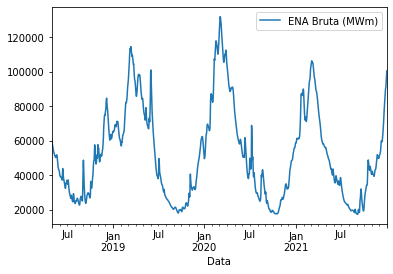

In [28]:
datainicio,datafim = '2018-05-01','2021-12-31'
df_ENA_total_plot = df_ENA_total
df_ENA_total_plot['Data'] = df_ENA_total.index
df_ENA_total_plot = df_ENA_total_plot.loc[datainicio:datafim]
df_ENA_total = df_ENA_total.drop(columns=['Data'])
ENAPLOT = df_ENA_total_plot.plot(x = 'Data', y='ENA Bruta (MWm)', kind = 'line')
#ENAPLOT.get_figure().savefig(r'C:\Users\pablo\OneDrive\Pictures\AAA TCC\Plots_Iniciais\ENA')

In [29]:
#df_final_ENASub.to_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados Tratados\ENA_Sub_2018_2021_diario.xlsx')
#df_ENA_total.to_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados Tratados\ENA_Total_2018_2021_diario.xlsx')

________________________________________________________________________________________________________________________

# EAR por Subsistema

In [30]:
df_EAR2018 = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\EAR_DIARIO_SUBSISTEMA_2018.xlsx')
df_EAR2019 = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\EAR_DIARIO_SUBSISTEMA_2019.xlsx')
df_EAR2020 = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\EAR_DIARIO_SUBSISTEMA_2020.xlsx')
df_EAR2021 = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\EAR_DIARIO_SUBSISTEMA_2021.xlsx')
df_EAR_leitura = df_EAR2018.append(df_EAR2019.append(df_EAR2020.append(df_EAR2021)))
df_EAR_leitura

,id_subsistema,nom_subsistema,ear_data,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual
0,NE,NORDESTE,2018-01-01,51602.070312,6659.575195,12.905600
1,N,NORTE,2018-01-01,15164.886719,3631.470947,23.946600
2,SE,SUDESTE,2018-01-01,202691.937500,46399.625000,22.891701
3,S,SUL,2018-01-01,19415.960938,11354.141602,58.478401
4,NE,NORDESTE,2018-01-02,51602.070312,6857.420898,13.289000
...,...,...,...,...,...,...
1455,S,SUL,2021-12-30,19657.330078,8429.338867,42.881401
1456,NE,NORDESTE,2021-12-31,51691.226562,27057.099609,52.343700
1457,N,NORTE,2021-12-31,15302.396484,8346.119141,54.541302
1458,SE,SUDESTE,2021-12-31,204560.843750,52532.800781,25.680799


In [31]:
def renomearEAR(df):
    df = df.drop(columns={'id_subsistema'})
    df = df.rename(columns = {'nom_subsistema' : 'Subsistema', 'ear_data' : 'Data', 'ear_max_subsistema' : 'EAR Máx.',
                              'ear_verif_subsistema_mwmes' : 'EAR Verif. (MWmês)',
                              'ear_verif_subsistema_percentual':'EAR Verif (%)'})
    df['Data'] = pd.to_datetime(df['Data'])
    df = df.set_index('Data')
    return df

def tratamentoEAR(df1):
    l = len(df1.index.drop_duplicates())
    dfaux_N = pd.DataFrame({'N - EAR Máx.' : [0.000]*l, 'N - EAR Verif. (MWmês)' : [0.000]*l,
                            'N - EAR Verif (%)' : [0.000]*l})
    dfaux_N.index = df1.index.drop_duplicates()

    dfaux_NE = pd.DataFrame({'NE - EAR Máx.' : [0.000]*l, 'NE - EAR Verif. (MWmês)' : [0.000]*l,
                            'NE - EAR Verif (%)' : [0.000]*l})
    dfaux_NE.index = df1.index.drop_duplicates()

    dfaux_SE = pd.DataFrame({'SE - EAR Máx.' : [0.000]*l, 'SE - EAR Verif. (MWmês)' : [0.000]*l,
                            'SE - EAR Verif (%)' : [0.000]*l})
    dfaux_SE.index = df1.index.drop_duplicates()

    dfaux_S = pd.DataFrame({'S - EAR Máx.' : [0.000]*l, 'S - EAR Verif. (MWmês)' : [0.000]*l,
                            'S - EAR Verif (%)' : [0.000]*l})
    dfaux_S.index = df1.index.drop_duplicates()

    for i in df1.index:
        for j in [0,1,2,3]:
            if df1.loc[i].iloc[j][0] == 'SUDESTE':
                dfaux_SE.loc[i]['SE - EAR Máx.'] = df1.loc[i].iloc[j][1]
                dfaux_SE.loc[i]['SE - EAR Verif. (MWmês)'] = df1.loc[i].iloc[j][2]
                dfaux_SE.loc[i]['SE - EAR Verif (%)'] = df1.loc[i].iloc[j][3]
                
            if df1.loc[i].iloc[j][0] == 'SUL':
                dfaux_S.loc[i]['S - EAR Máx.'] = df1.loc[i].iloc[j][1]
                dfaux_S.loc[i]['S - EAR Verif. (MWmês)'] = df1.loc[i].iloc[j][2]
                dfaux_S.loc[i]['S - EAR Verif (%)'] = df1.loc[i].iloc[j][3]
                
            if df1.loc[i].iloc[j][0] == 'NORDESTE':
                dfaux_NE.loc[i]['NE - EAR Máx.'] = df1.loc[i].iloc[j][1]
                dfaux_NE.loc[i]['NE - EAR Verif. (MWmês)'] = df1.loc[i].iloc[j][2]
                dfaux_NE.loc[i]['NE - EAR Verif (%)'] = df1.loc[i].iloc[j][3]
                
            if df1.loc[i].iloc[j][0] == 'NORTE':
                dfaux_N.loc[i]['N - EAR Máx.'] = df1.loc[i].iloc[j][1]
                dfaux_N.loc[i]['N - EAR Verif. (MWmês)'] = df1.loc[i].iloc[j][2]
                dfaux_N.loc[i]['N - EAR Verif (%)'] = df1.loc[i].iloc[j][3]
                

    df_final = dfaux_SE.join(dfaux_S.join(dfaux_NE.join(dfaux_N)))
    return df_final

In [32]:
df_EAR_renomeado = renomearEAR(df_EAR_leitura)


In [33]:
df_final_EARSub = tratamentoEAR(df_EAR_renomeado)
df_final_EARSub

,SE - EAR Máx.,SE - EAR Verif. (MWmês),SE - EAR Verif (%),S - EAR Máx.,S - EAR Verif. (MWmês),S - EAR Verif (%),NE - EAR Máx.,NE - EAR Verif. (MWmês),NE - EAR Verif (%),N - EAR Máx.,N - EAR Verif. (MWmês),N - EAR Verif (%)
Data,,,,,,,,,,,,
2018-01-01,202691.93750,46399.625000,22.891701,19415.960938,11354.141602,58.478401,51602.070312,6659.575195,12.905600,15164.886719,3631.470947,23.946600
2018-01-02,202691.93750,47148.289062,23.261101,19415.960938,11566.771484,59.573502,51602.070312,6857.420898,13.289000,15164.886719,3619.916016,23.870399
2018-01-03,202691.93750,47760.648438,23.563200,19415.960938,11708.678711,60.304401,51602.070312,6962.523926,13.492700,15164.886719,3575.654053,23.578501
2018-01-04,202691.93750,48543.335938,23.949301,19415.960938,11820.333984,60.879501,51602.070312,7064.151855,13.689700,15164.886719,3535.220947,23.311899
2018-01-05,202691.93750,49402.789062,24.373301,19415.960938,11880.441406,61.188999,51602.070312,7128.437988,13.814200,15164.886719,3512.793945,23.164000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,204560.84375,50495.136719,24.684700,19657.330078,8490.170898,43.190899,51691.226562,25539.363281,49.407501,15302.396484,6978.579102,45.604500
2021-12-28,204560.84375,50857.890625,24.862000,19657.330078,8457.606445,43.025200,51691.226562,25881.376953,50.069199,15302.396484,7271.638184,47.519600
2021-12-29,204560.84375,51165.597656,25.012400,19657.330078,8446.969727,42.971100,51691.226562,26212.716797,50.710201,15302.396484,7551.159180,49.346298


In [34]:
df_EAR_total = df_EAR_renomeado.resample('D').sum()
df_EAR_total['EAR Verif. Total (%)'] = df_EAR_total['EAR Verif. (MWmês)']/df_EAR_total['EAR Máx.']
df_EAR_total = df_EAR_total.drop(columns='EAR Verif (%)')
df_EAR_total

,EAR Máx.,EAR Verif. (MWmês),EAR Verif. Total (%)
Data,,,
2018-01-01,288874.855469,68044.812744,0.235551
2018-01-02,288874.855469,69192.397461,0.239524
2018-01-03,288874.855469,70007.505127,0.242345
2018-01-04,288874.855469,70963.042725,0.245653
2018-01-05,288874.855469,71924.462402,0.248981
...,...,...,...
2021-12-27,291211.796875,91503.250000,0.314215
2021-12-28,291211.796875,92468.512207,0.317530
2021-12-29,291211.796875,93376.443359,0.320648


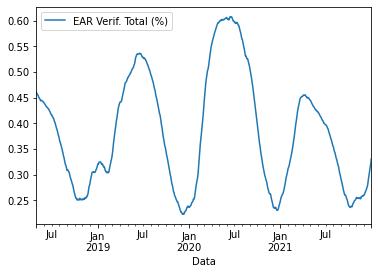

In [35]:
datainicio,datafim = '2018-05-01','2021-12-31'
df_EAR_total_plot = df_EAR_total
df_EAR_total_plot['Data'] = df_EAR_total.index
df_EAR_total_plot = df_EAR_total_plot.loc[datainicio:datafim]
EARPLOT = df_EAR_total_plot.plot(x = 'Data', y='EAR Verif. Total (%)', kind = 'line')
df_EAR_total = df_EAR_total.drop(columns=['Data'])
EARPLOT.get_figure().savefig(r'C:\Users\pablo\OneDrive\Pictures\AAA TCC\Plots_Iniciais\teste')

In [36]:
df_EAR_total

,EAR Máx.,EAR Verif. (MWmês),EAR Verif. Total (%)
Data,,,
2018-01-01,288874.855469,68044.812744,0.235551
2018-01-02,288874.855469,69192.397461,0.239524
2018-01-03,288874.855469,70007.505127,0.242345
2018-01-04,288874.855469,70963.042725,0.245653
2018-01-05,288874.855469,71924.462402,0.248981
...,...,...,...
2021-12-27,291211.796875,91503.250000,0.314215
2021-12-28,291211.796875,92468.512207,0.317530
2021-12-29,291211.796875,93376.443359,0.320648


In [37]:
#df_final_EARSub.to_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados Tratados\EAR_Sub_2018_2021_diario.xlsx')
#df_EAR_total.to_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados Tratados\EAR_Total_2018_2021_diario.xlsx')

________________________________________________________________________________________________________________________

# Carga diária Energia

In [38]:
df_carga2018 = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\CARGA_ENERGIA_2018.xlsx')
df_carga2019 = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\CARGA_ENERGIA_2019.xlsx')
df_carga2020 = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\CARGA_ENERGIA_2020.xlsx')
df_carga2021 = pd.read_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados\CARGA_ENERGIA_2021.xlsx')
df_carga_leitura = df_carga2018.append(df_carga2019.append(df_carga2020.append(df_carga2021)))
df_carga_leitura

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
0,N,NORTE,2018-01-01,4828.072500
1,NE,NORDESTE,2018-01-01,9237.886833
2,S,SUL,2018-01-01,8350.809208
3,SE,SUDESTE,2018-01-01,30268.424125
4,N,NORTE,2018-01-02,5430.981000
...,...,...,...,...
1455,SE,SUDESTE,2021-12-30,38850.805500
1456,N,NORTE,2021-12-31,5396.575583
1457,NE,NORDESTE,2021-12-31,10835.873958
1458,S,SUL,2021-12-31,10689.669167


In [39]:
def renomearCarga(df):
    df = df.drop(columns={'id_subsistema'})
    df = df.rename(columns = {'nom_subsistema' : 'Subsistema', 'din_instante' : 'Data', 'val_cargaenergiamwmed' : 'Carga (MWm)'})
    df['Data'] = pd.to_datetime(df['Data'])
    df = df.set_index('Data')
    return df

def tratamentoCarga(df1):
    l = len(df1.index.drop_duplicates())
    dfaux_N = pd.DataFrame({'N - Carga (MWm)' : [0.000]*l})
    dfaux_N.index = df1.index.drop_duplicates()

    dfaux_NE = pd.DataFrame({'NE - Carga (MWm)' : [0.000]*l})
    dfaux_NE.index = df1.index.drop_duplicates()

    dfaux_SE = pd.DataFrame({'SE - Carga (MWm)' : [0.000]*l})
    dfaux_SE.index = df1.index.drop_duplicates()

    dfaux_S = pd.DataFrame({'S - Carga (MWm)' : [0.000]*l})
    dfaux_S.index = df1.index.drop_duplicates()

    for i in df1.index:
        for j in [0,1,2,3]:
            if df1.loc[i].iloc[j][0] == 'SUDESTE':
                dfaux_SE.loc[i]['SE - Carga (MWm)'] = df1.loc[i].iloc[j][1]
                                
            if df1.loc[i].iloc[j][0] == 'SUL':
                dfaux_S.loc[i]['S - Carga (MWm)'] = df1.loc[i].iloc[j][1]
                                
            if df1.loc[i].iloc[j][0] == 'NORDESTE':
                dfaux_NE.loc[i]['NE - Carga (MWm)'] = df1.loc[i].iloc[j][1]
                
            if df1.loc[i].iloc[j][0] == 'NORTE':
                dfaux_N.loc[i]['N - Carga (MWm)'] = df1.loc[i].iloc[j][1]
                

    df_final = dfaux_SE.join(dfaux_S.join(dfaux_NE.join(dfaux_N)))
    return df_final

In [40]:
df_carga_renomeado = renomearCarga(df_carga_leitura)
df_carga_renomeado

,Subsistema,Carga (MWm)
Data,,
2018-01-01,NORTE,4828.072500
2018-01-01,NORDESTE,9237.886833
2018-01-01,SUL,8350.809208
2018-01-01,SUDESTE,30268.424125
2018-01-02,NORTE,5430.981000
...,...,...
2021-12-30,SUDESTE,38850.805500
2021-12-31,NORTE,5396.575583
2021-12-31,NORDESTE,10835.873958


In [41]:
df_final_Carga = tratamentoCarga(df_carga_renomeado)
df_final_Carga

,SE - Carga (MWm),S - Carga (MWm),NE - Carga (MWm),N - Carga (MWm)
Data,,,,
2018-01-01,30268.424125,8350.809208,9237.886833,4828.072500
2018-01-02,36875.340208,10178.032542,10783.592583,5430.981000
2018-01-03,38552.692625,11138.505208,11157.162458,5457.938833
2018-01-04,37938.604708,11696.335667,11154.239625,5406.326042
2018-01-05,37663.779667,12369.500833,10969.048625,5449.582750
...,...,...,...,...
2021-12-27,39736.502167,12344.740917,11142.533917,5842.368500
2021-12-28,40201.573667,12652.599667,11186.287667,5914.309708
2021-12-29,40083.157792,12591.653250,11279.949792,6018.970958


In [42]:
df_Carga_total = df_carga_renomeado.resample('D').sum()
df_Carga_total

,Carga (MWm)
Data,
2018-01-01,52685.192667
2018-01-02,63267.946333
2018-01-03,66306.299125
2018-01-04,66195.506042
2018-01-05,66451.911875
...,...
2021-12-27,69066.145500
2021-12-28,69954.770708
2021-12-29,69973.731792


In [43]:
df_Carga_total


,Carga (MWm)
Data,
2018-01-01,52685.192667
2018-01-02,63267.946333
2018-01-03,66306.299125
2018-01-04,66195.506042
2018-01-05,66451.911875
...,...
2021-12-27,69066.145500
2021-12-28,69954.770708
2021-12-29,69973.731792


In [44]:
rolLmeanCarga = df_Carga_total['Carga (MWm)'].rolling(7).mean()
df_Carga_total['Media Móvel 7'] = rolLmeanCarga

In [45]:
df_Carga_total

,Carga (MWm),Media Móvel 7
Data,,
2018-01-01,52685.192667,NaN
2018-01-02,63267.946333,NaN
2018-01-03,66306.299125,NaN
2018-01-04,66195.506042,NaN
2018-01-05,66451.911875,NaN
...,...,...
2021-12-27,69066.145500,66970.400155
2021-12-28,69954.770708,66429.492506
2021-12-29,69973.731792,65782.750810


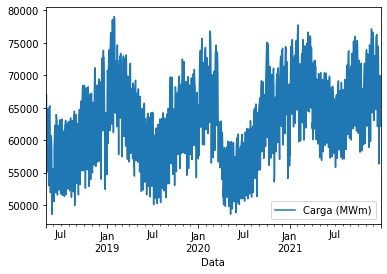

In [46]:
datainicio,datafim = '2018-05-01','2021-12-31'
df_Carga_total_plot = df_Carga_total
df_Carga_total_plot['Data'] = df_Carga_total.index
df_Carga_total_plot = df_Carga_total_plot.loc[datainicio:datafim]
df_Carga_total = df_Carga_total.drop(columns=['Data'])
CARGAPLOT = df_Carga_total_plot.plot(x = 'Data', y='Carga (MWm)', kind = 'line')
#CARGAPLOT.get_figure().savefig(r'C:\Users\pablo\OneDrive\Pictures\AAA TCC\Plots_Iniciais\Carga')

In [47]:
df_final_Carga

,SE - Carga (MWm),S - Carga (MWm),NE - Carga (MWm),N - Carga (MWm)
Data,,,,
2018-01-01,30268.424125,8350.809208,9237.886833,4828.072500
2018-01-02,36875.340208,10178.032542,10783.592583,5430.981000
2018-01-03,38552.692625,11138.505208,11157.162458,5457.938833
2018-01-04,37938.604708,11696.335667,11154.239625,5406.326042
2018-01-05,37663.779667,12369.500833,10969.048625,5449.582750
...,...,...,...,...
2021-12-27,39736.502167,12344.740917,11142.533917,5842.368500
2021-12-28,40201.573667,12652.599667,11186.287667,5914.309708
2021-12-29,40083.157792,12591.653250,11279.949792,6018.970958


In [ ]:
#df_final_Carga.to_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados Tratados\Carga_Sub_2018_2021_diario.xlsx')
#df_Carga_total.to_excel(r'C:\Users\pablo\OneDrive\Documents\AAA_TCC\Dados Tratados\Carga_Total_2018_2021_diario.xlsx')

________________________________________________________________________________________________________________________

# Junção Variáveis

In [48]:
def JoinVar (df1, df2, df3, df4, df5, df6, df7):
    lista = [df2, df3, df4, df5, df6, df7]
    df_final = df1
    for i in lista:
        df_final = df_final.join(i)
    return df_final

In [50]:
df_var = JoinVar (df_final_PLD_2, df_final_ENASub, df_final_EARSub, df_final_Carga, df_Carga_total, df_ENA_total, df_EAR_total)
df_var.columns

Index(['SE - PLD Médio (R$/MWh)', 'S - PLD Médio (R$/MWh)',
       'NE - PLD Médio (R$/MWh)', 'N - PLD Médio (R$/MWh)', 'Data',
       'SE - ENA Bruta (MWm)', 'SE - ENA Bruta (%)',
       'SE - ENA Bruta Armaz. (MWm)', 'SE - ENA Armaz. (%)',
       'S - ENA Bruta (MWm)', 'S - ENA Bruta (%)',
       'S - ENA Bruta Armaz. (MWm)', 'S - ENA Armaz. (%)',
       'NE - ENA Bruta (MWm)', 'NE - ENA Bruta (%)',
       'NE - ENA Bruta Armaz. (MWm)', 'NE - ENA Armaz. (%)',
       'N - ENA Bruta (MWm)', 'N - ENA Bruta (%)',
       'N - ENA Bruta Armaz. (MWm)', 'N - ENA Armaz. (%)', 'SE - EAR Máx.',
       'SE - EAR Verif. (MWmês)', 'SE - EAR Verif (%)', 'S - EAR Máx.',
       'S - EAR Verif. (MWmês)', 'S - EAR Verif (%)', 'NE - EAR Máx.',
       'NE - EAR Verif. (MWmês)', 'NE - EAR Verif (%)', 'N - EAR Máx.',
       'N - EAR Verif. (MWmês)', 'N - EAR Verif (%)', 'SE - Carga (MWm)',
       'S - Carga (MWm)', 'NE - Carga (MWm)', 'N - Carga (MWm)', 'Carga (MWm)',
       'Media Móvel 7', 'ENA Bruta (MW

In [51]:
df_corr = df_var.corr()
df_corr.style.background_gradient(cmap='coolwarm')

,SE - PLD Médio (R$/MWh),S - PLD Médio (R$/MWh),NE - PLD Médio (R$/MWh),N - PLD Médio (R$/MWh),SE - ENA Bruta (MWm),SE - ENA Bruta (%),SE - ENA Bruta Armaz. (MWm),SE - ENA Armaz. (%),S - ENA Bruta (MWm),S - ENA Bruta (%),S - ENA Bruta Armaz. (MWm),S - ENA Armaz. (%),NE - ENA Bruta (MWm),NE - ENA Bruta (%),NE - ENA Bruta Armaz. (MWm),NE - ENA Armaz. (%),N - ENA Bruta (MWm),N - ENA Bruta (%),N - ENA Bruta Armaz. (MWm),N - ENA Armaz. (%),SE - EAR Máx.,SE - EAR Verif. (MWmês),SE - EAR Verif (%),S - EAR Máx.,S - EAR Verif. (MWmês),S - EAR Verif (%),NE - EAR Máx.,NE - EAR Verif. (MWmês),NE - EAR Verif (%),N - EAR Máx.,N - EAR Verif. (MWmês),N - EAR Verif (%),SE - Carga (MWm),S - Carga (MWm),NE - Carga (MWm),N - Carga (MWm),Carga (MWm),Media Móvel 7,ENA Bruta (MWm),ENA Armaz. (MWm),EAR Máx.,EAR Verif. (MWmês),EAR Verif. Total (%)
SE - PLD Médio (R$/MWh),1.000000,0.994705,0.909312,0.884002,-0.456428,-0.491654,-0.464533,-0.455538,-0.059174,-0.114586,-0.041597,-0.101654,-0.500729,-0.530166,-0.501979,-0.541761,-0.479774,-0.432363,-0.478584,-0.329629,-0.029409,-0.449146,-0.447201,-0.289713,-0.180718,-0.173470,0.165258,-0.442120,-0.447985,0.076971,-0.096069,-0.098508,0.121529,0.082629,0.194463,0.225818,0.137828,0.112206,-0.519506,-0.512795,-0.001605,-0.462456,-0.461686
S - PLD Médio (R$/MWh),0.994705,1.000000,0.904744,0.878021,-0.430855,-0.480984,-0.439090,-0.447259,-0.073684,-0.128961,-0.057313,-0.117043,-0.470710,-0.513586,-0.471630,-0.524715,-0.454323,-0.425578,-0.454286,-0.330139,-0.026933,-0.437859,-0.435999,-0.280746,-0.201202,-0.193973,0.161269,-0.433345,-0.439084,0.071452,-0.091458,-0.093843,0.131827,0.098106,0.198766,0.221881,0.148357,0.125605,-0.494213,-0.488340,-0.000326,-0.453898,-0.453173
NE - PLD Médio (R$/MWh),0.909312,0.904744,1.000000,0.904331,-0.446987,-0.389409,-0.442921,-0.334980,-0.010383,-0.082901,0.008350,-0.071058,-0.477974,-0.494069,-0.479859,-0.506747,-0.513141,-0.422301,-0.521066,-0.320421,0.031212,-0.440932,-0.439546,-0.273832,-0.125596,-0.119064,0.213875,-0.449425,-0.456487,0.136314,-0.059133,-0.061980,0.072301,0.038958,0.199103,0.239989,0.098127,0.065714,-0.511988,-0.497719,0.059536,-0.449012,-0.448995
N - PLD Médio (R$/MWh),0.884002,0.878021,0.904331,1.000000,-0.578325,-0.445260,-0.567771,-0.372311,-0.063593,-0.165849,-0.056603,-0.167840,-0.507864,-0.393938,-0.511248,-0.407100,-0.614781,-0.383116,-0.634752,-0.260287,0.110757,-0.456550,-0.455916,-0.207597,-0.154471,-0.149019,0.221227,-0.393223,-0.400198,0.148828,-0.074835,-0.077828,0.020138,0.008442,0.137309,0.273484,0.051660,0.004417,-0.642517,-0.627355,0.123416,-0.449669,-0.450455
SE - ENA Bruta (MWm),-0.456428,-0.430855,-0.446987,-0.578325,1.000000,0.545385,0.996080,0.445929,-0.041514,0.129469,-0.036907,0.151537,0.827614,0.379964,0.834219,0.389409,0.719921,0.182807,0.790982,0.072333,-0.015887,0.085437,0.085042,0.083652,-0.169024,-0.167653,-0.082695,0.041745,0.043551,-0.048080,-0.243900,-0.243389,0.225822,0.277389,0.164607,-0.280284,0.213207,0.306996,0.960672,0.975901,-0.028753,0.028385,0.028477
SE - ENA Bruta (%),-0.491654,-0.480984,-0.389409,-0.445260,0.545385,1.000000,0.563227,0.985026,0.223128,0.212427,0.216540,0.203224,0.367431,0.463248,0.364735,0.459035,0.236147,0.334338,0.263015,0.312438,-0.278758,0.154029,0.156349,-0.058174,0.205912,0.208398,-0.278644,-0.139934,-0.132083,-0.215637,-0.100238,-0.097266,-0.140486,-0.041888,-0.043788,-0.296624,-0.123014,-0.166852,0.511125,0.531945,-0.295680,0.082649,0.086538
SE - ENA Bruta Armaz. (MWm),-0.464533,-0.439090,-0.442921,-0.567771,0.996080,0.563227,1.000000,0.475985,-0.030418,0.137768,-0.024186,0.160785,0.822780,0.388107,0.829853,0.398334,0.687344,0.174775,0.762699,0.076583,-0.010810,0.068965,0.068597,0.085495,-0.169470,-0.168041,-0.088607,0.025838,0.027866,-0.049880,-0.270550,-0.270018,0.227797,0.285328,0.171368,-0.279114,0.217398,0.300525,0.949056,0.972470,-0.027487,0.009815,0.009959
SE - ENA Armaz. (%),-0.455538,-0.447259,-0.334980,-0.372311,0.445929,0.985026,0.475985,1.000000,0.247359,0.214034,0.245548,0.2

________________________________________________________________________________________________________________________

# Escolha Variáveis

In [53]:
sel = ['S - PLD Médio (R$/MWh)', 'NE - PLD Médio (R$/MWh)',
       'N - PLD Médio (R$/MWh)','SE - ENA Bruta (%)','SE - ENA Armaz. (%)','SE - EAR Verif (%)',
     'Carga (MWm)','Media Móvel 7', 'ENA Bruta (MWm)','ENA Armaz. (MWm)','EAR Verif. Total (%)']
df_escolhido = pd.DataFrame( {'SE - PLD Médio (R$/MWh)':df_var['SE - PLD Médio (R$/MWh)']})
for i in sel:
    df_escolhido = df_escolhido.join(df_var[i])
df_escolhido

,SE - PLD Médio (R$/MWh),S - PLD Médio (R$/MWh),NE - PLD Médio (R$/MWh),N - PLD Médio (R$/MWh),SE - ENA Bruta (%),SE - ENA Armaz. (%),SE - EAR Verif (%),Carga (MWm),Media Móvel 7,ENA Bruta (MWm),ENA Armaz. (MWm),EAR Verif. Total (%)
Data,,,,,,,,,,,,
2018-05-02,214.646667,214.662500,190.621250,178.925000,88.275002,76.983398,43.900200,65381.392583,62470.348417,58970.907959,49664.467773,0.458910
2018-05-03,168.905833,168.934167,120.433333,120.406667,86.215599,78.004204,43.828999,66938.248333,62346.022095,57479.126953,49444.537354,0.457995
2018-05-04,225.345833,225.367500,114.855000,114.823333,84.744102,77.204201,43.728298,67031.116625,62219.178869,56654.833008,48306.832764,0.456794
2018-05-05,275.532500,275.570833,123.934583,123.894583,83.725899,75.946098,43.696999,61356.033375,62134.300214,55804.570068,46507.023682,0.456325
2018-05-06,155.334583,155.357917,77.849167,77.827500,82.473701,71.800201,43.691299,55092.441625,62080.463613,54926.362549,44621.667969,0.456129
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,68.084167,68.085000,68.037917,68.037083,110.278900,96.091698,24.684700,69066.145500,66970.400155,90544.118652,79667.989746,0.314215
2021-12-28,68.389167,68.389167,68.353333,68.352500,110.417297,96.244102,24.862000,69954.770708,66429.492506,91952.735107,80709.130127,0.317530
2021-12-29,66.705417,66.705417,66.067500,65.970833,111.535103,96.548798,25.012400,69973.731792,65782.750810,94431.855835,82476.878052,0.320648


In [54]:
sel_2 = ['ENA Bruta (MWm)','EAR Verif. (MWmês)','Carga (MWm)']
df_4_features = pd.DataFrame( {'SE - PLD Médio (R$/MWh)':df_var['SE - PLD Médio (R$/MWh)']})
for i in sel_2:
    df_4_features = df_4_features.join(df_var[i])
df_4_features

,SE - PLD Médio (R$/MWh),ENA Bruta (MWm),EAR Verif. (MWmês),Carga (MWm)
Data,,,,
2018-05-02,214.646667,58970.907959,132567.533203,65381.392583
2018-05-03,168.905833,57479.126953,132303.383789,66938.248333
2018-05-04,225.345833,56654.833008,131956.226563,67031.116625
2018-05-05,275.532500,55804.570068,131820.939453,61356.033375
2018-05-06,155.334583,54926.362549,131764.245117,55092.441625
...,...,...,...,...
2021-12-27,68.084167,90544.118652,91503.250000,69066.145500
2021-12-28,68.389167,91952.735107,92468.512207,69954.770708
2021-12-29,66.705417,94431.855835,93376.443359,69973.731792


In [55]:
df_escolhido_2 = df_4_features
df_escolhido_2

,SE - PLD Médio (R$/MWh),ENA Bruta (MWm),EAR Verif. (MWmês),Carga (MWm)
Data,,,,
2018-05-02,214.646667,58970.907959,132567.533203,65381.392583
2018-05-03,168.905833,57479.126953,132303.383789,66938.248333
2018-05-04,225.345833,56654.833008,131956.226563,67031.116625
2018-05-05,275.532500,55804.570068,131820.939453,61356.033375
2018-05-06,155.334583,54926.362549,131764.245117,55092.441625
...,...,...,...,...
2021-12-27,68.084167,90544.118652,91503.250000,69066.145500
2021-12-28,68.389167,91952.735107,92468.512207,69954.770708
2021-12-29,66.705417,94431.855835,93376.443359,69973.731792


In [56]:
sel_3 = ['ENA Bruta (MWm)','EAR Verif. (MWmês)']
df_3_features = pd.DataFrame( {'SE - PLD Médio (R$/MWh)':df_var['SE - PLD Médio (R$/MWh)']})
for i in sel_3:
    df_3_features = df_3_features.join(df_var[i])
df_3_features

,SE - PLD Médio (R$/MWh),ENA Bruta (MWm),EAR Verif. (MWmês)
Data,,,
2018-05-02,214.646667,58970.907959,132567.533203
2018-05-03,168.905833,57479.126953,132303.383789
2018-05-04,225.345833,56654.833008,131956.226563
2018-05-05,275.532500,55804.570068,131820.939453
2018-05-06,155.334583,54926.362549,131764.245117
...,...,...,...
2021-12-27,68.084167,90544.118652,91503.250000
2021-12-28,68.389167,91952.735107,92468.512207
2021-12-29,66.705417,94431.855835,93376.443359


In [57]:
sel_4 = ['ENA Bruta (MWm)','EAR Verif. (MWmês)','Media Móvel 7']
df_4_features_mediacarga = pd.DataFrame( {'SE - PLD Médio (R$/MWh)':df_var['SE - PLD Médio (R$/MWh)']})
for i in sel_4:
    df_4_features_mediacarga = df_4_features_mediacarga.join(df_var[i])
df_4_features_mediacarga

,SE - PLD Médio (R$/MWh),ENA Bruta (MWm),EAR Verif. (MWmês),Media Móvel 7
Data,,,,
2018-05-02,214.646667,58970.907959,132567.533203,62470.348417
2018-05-03,168.905833,57479.126953,132303.383789,62346.022095
2018-05-04,225.345833,56654.833008,131956.226563,62219.178869
2018-05-05,275.532500,55804.570068,131820.939453,62134.300214
2018-05-06,155.334583,54926.362549,131764.245117,62080.463613
...,...,...,...,...
2021-12-27,68.084167,90544.118652,91503.250000,66970.400155
2021-12-28,68.389167,91952.735107,92468.512207,66429.492506
2021-12-29,66.705417,94431.855835,93376.443359,65782.750810


In [58]:
df_mediacarga_mod = df_4_features_mediacarga.rename(columns={'Media Móvel 7':'Média Móvel 7d Carga (MWm)'})
corr_mediacarga = df_mediacarga_mod.corr()
corr_mediacarga.style.set_table_styles([dict(selector="th",props=[('max-width', '100px')])]).set_precision(3).set_properties(**{'font-size': '10pt'}).background_gradient(cmap='coolwarm')

C:\Users\pablo\AppData\Local\Temp/ipykernel_35972/2953183858.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_mediacarga.style.set_table_styles([dict(selector="th",props=[('max-width', '100px')])]).set_precision(3).set_properties(**{'font-size': '10pt'}).background_gradient(cmap='coolwarm')


,SE - PLD Médio (R$/MWh),ENA Bruta (MWm),EAR Verif. (MWmês),Média Móvel 7d Carga (MWm)
SE - PLD Médio (R$/MWh),1.000,-0.520,-0.462,0.112
ENA Bruta (MWm),-0.520,1.000,0.175,0.257
EAR Verif. (MWmês),-0.462,0.175,1.000,-0.585
Média Móvel 7d Carga (MWm),0.112,0.257,-0.585,1.000


________________________________________________________________________________________________________________________

# Escalas

In [59]:
scaler_minmax_mc = MinMaxScaler(feature_range=(-1,1))
scaler_MinMax_4_features_mc = scaler_minmax_mc.fit(df_4_features_mediacarga)
array_4_features_MinMax_scale_mc = scaler_MinMax_4_features_mc.transform(df_4_features_mediacarga)
df_4_features_MinMax_scale_mc = pd.DataFrame(array_4_features_MinMax_scale_mc)
df_4_features_MinMax_scale_mc = df_4_features_MinMax_scale_mc.rename(columns={0:'SE - PLD Médio (R$/MWh)', 1:'ENA Bruta (MWm)', 2: 'EAR Verif. (MWmês)', 3: 'Media Móvel 7'})
df_4_features_MinMax_scale_mc = df_4_features_MinMax_scale_mc.set_index(df_4_features_mediacarga.index)

________________________________________________________________________________________________________________________

# PCA

In [62]:
n_components=3
pca = PCA(n_components)
pca.fit(df_4_features_MinMax_scale_mc.values) 

PCA(n_components=3)

In [63]:
np.set_printoptions(precision=3, suppress=True)
print('explained variance ratio:', pca.explained_variance_ratio_) 
print('Components:')
print(pca.components_)

explained variance ratio: [0.54  0.297 0.106]
Components:
[[-0.698  0.322  0.603 -0.213]
 [-0.358  0.539 -0.498  0.578]
 [ 0.619  0.653  0.416  0.133]]


In [64]:
components = pca.fit_transform(df_4_features_MinMax_scale_mc)
components

array([[ 0.432, -0.195,  0.108],
       [ 0.541, -0.154, -0.017],
       [ 0.39 , -0.239,  0.098],
       ...,
       [ 0.522,  0.86 , -0.075],
       [ 0.561,  0.853, -0.036],
       [ 0.609,  0.859, -0.   ]])

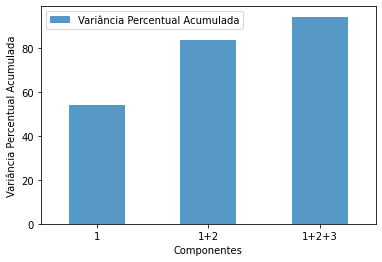

In [65]:
a = pca.explained_variance_ratio_[0]*100
b = pca.explained_variance_ratio_[1]*100
c = pca.explained_variance_ratio_[2]*100
df_plot_PCA = pd.DataFrame({"Componentes":['1','1+2','1+2+3'],'Variância Percentual Acumulada' :[a, a+b, a+b+c]})
PCAPLOT = df_plot_PCA.plot(x = 'Componentes', y='Variância Percentual Acumulada', kind = 'bar',alpha=0.75, rot=0, ylabel = 'Variância Percentual Acumulada')
#PCAPLOT.get_figure().savefig(r'C:\Users\pablo\OneDrive\Pictures\AAA TCC\Plots_vars_final\PCA')

In [68]:
total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"CP {i+1}" for i in range(n_components)}
labels['color'] = 'PLD Médio em escala'

fig = px.scatter_matrix(
    components,
    color=df_4_features_MinMax_scale_mc['SE - PLD Médio (R$/MWh)'],
    dimensions=range(n_components),
    labels=labels,
    #title=f'Total Explained Variance: {total_var:.2f}%',
)
#fig.update_traces(diagonal_visible=False)
fig.show()
#fig.write_image(r'C:\Users\pablo\OneDrive\Pictures\AAA TCC\Plots_Iniciais\Scatter_plot_PCA.png', scale=1, width=1000, height=800)
#fig.savefig(r'C:\Users\pablo\OneDrive\Pictures\AAA TCC\Plots_Iniciais\Scatter_plot_PCA')